Analyzing Crypto and NYSE..   Basically Cryptos to the SP500 INDEX    using logarithmic plotly express and a Heat map...   
comparing crypto coins to the sp500 index last 5 years. 

In [3]:
import numpy as np

import pandas as pd

In [4]:
import pandas_datareader as web
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
import datetime as dt
import plotly.express as px
import datetime
import matplotlib.pyplot as plt
import yfinance as yf


First chart is regular logarithmic chart then second is Interactive using Plotly Express 

Import the required libraries:

datetime for working with dates.
yfinance for fetching historical stock data from Yahoo Finance.
pandas for handling data in a DataFrame.
plotly.express for creating interactive plots.
Set up the necessary variables:

currency: The currency for the stock data.
metric: The specific metric we want to plot (in this case, "Close").
start: The start date for fetching the stock data.
end: The end date for fetching the stock data.
asset: A list of cryptocurrency tickers and NYSX tickers we want to fetch data for.
Fetch the historical stock data:

Loop through each ticker in the asset list.
For each ticker, use yf.download() to fetch the historical stock data between start and end dates.
Reset the index to have the 'Date' column as a regular column using reset_index().
Select the 'Date' and specified metric columns.
Convert the metric column to a float data type.
Add a new column 'Ticker' with the ticker name.
Append the fetched data to the data_frames list.
If there's an error, print a message indicating that data is not available for the specific ticker.
Concatenate the fetched data:

Use pd.concat() to concatenate all DataFrames in the data_frames list into a single DataFrame called combined.
Create an interactive plot using Plotly Express:

Use px.line() to create a line plot with the following parameters:
x='Date': Set the x-axis to display the 'Date' column.
y=metric: Set the y-axis to display the specified metric column.
color='Ticker': Set the color of the lines based on the 'Ticker' column, so each cryptocurrency has a different color.
log_y=True: Set the y-axis to a logarithmic scale.
Store the created plot in the fig variable.
Use fig.show() to display the interactive plot.
This code fetches the historical price data for the specified cryptocurrencies, concatenates the data into a single DataFrame, and creates an interactive line plot using Plotly Express on a logarithmic scale. 

Regular logarithmic chart ..   

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- DOT1-USD: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


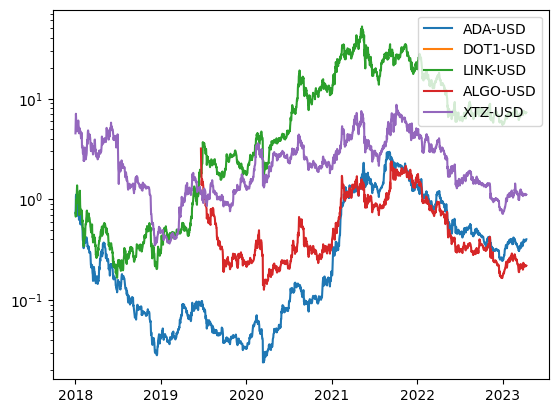

In [5]:
currency = "USD"
metric = "Close"

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime.now()

asset = ['ADA-USD', 'DOT1-USD', 'LINK-USD', 'ALGO-USD', 'XTZ-USD',]
data_frames = []

for ticker in asset:
    try:
        data = yf.download(ticker, start=start, end=end)
        data_frames.append(data[[metric]].rename(columns={metric: ticker}))
    except KeyError:
        print(f"Data for {ticker} not available")
        continue

combined = pd.concat(data_frames, axis=1)

plt.yscale('log')

for ticker in combined.columns:
    plt.plot(combined[ticker], label=ticker)

plt.legend(loc="upper right")
plt.show()

Using interactive Plotly Express..  

In [6]:
currency = "USD"
metric = "Close"

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime.now()

assets = ['ADA-USD', 'DOT1-USD', 'LINK-USD', 'ALGO-USD', 'XTZ-USD','BTC-USD','^GSPC']
data_frames = []

for ticker in assets:
    try:
        data = yf.download(ticker, start=start, end=end)
        data = data.reset_index()[['Date', metric]]
        data[metric] = data[metric].astype(float)
        data['Ticker'] = ticker
        data_frames.append(data)
    except KeyError:
        print(f"Data for {ticker} not available")
        continue

combined = pd.concat(data_frames)

fig = px.line(combined, x='Date', y=metric, color='Ticker', log_y=True)
fig.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- DOT1-USD: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
import plotly.figure_factory as ff


In [8]:
currency = "USD"
metric = "Close"

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime.now()

assets = ['ADA-USD', 'DOT-USD', 'LINK-USD', 'ALGO-USD', 'XTZ-USD', 'BTC-USD','^GSPC']
data_frames = []

for ticker in assets:
    try:
        data = yf.download(ticker, start=start, end=end)
        data_frames.append(data[[metric]].rename(columns={metric: ticker}))
    except KeyError:
        print(f"Data for {ticker} not available")
        continue

combined = pd.concat(data_frames, axis=1)

# Calculate the correlation matrix
corr_matrix = combined.corr()

# Create the heatmap
fig = ff.create_annotated_heatmap(z=corr_matrix.values, x=list(corr_matrix.columns), y=list(corr_matrix.index), colorscale='Viridis')
fig.update_layout(title='Cryptocurrency Correlation Heatmap', xaxis_title='Cryptocurrency', yaxis_title='Cryptocurrency')
fig.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
